# Estimating effect of multiple treatments

In [1]:
from dowhy import CausalModel
import dowhy.datasets

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = dowhy.datasets.linear_dataset(10, num_common_causes=4, num_samples=10000,
                                     num_instruments=0, num_effect_modifiers=2,
                                     num_treatments=2,
                                     treatment_is_binary=False,
                                     num_discrete_common_causes=2,
                                     num_discrete_effect_modifiers=0,
                                     one_hot_encode=False)
df=data['df']
df.head()

,X0,X1,W0,W1,W2,W3,v0,v1,y
0,1.193368,-0.079199,-0.095349,-0.736955,0,3,12.076998,3.423860,381.909582
1,0.957694,-0.975926,-0.741526,0.285930,2,2,19.339292,13.899160,818.634671
2,1.346045,-0.937950,-1.784782,-0.241251,0,2,4.225166,-3.642105,-50.840597
3,-0.344569,-1.113944,-0.093497,-1.230112,2,0,4.740947,4.883989,-6.291206
4,-0.184804,0.995653,-1.668237,0.088981,3,0,14.066183,12.942353,634.463301


In [3]:
model = CausalModel(data=data["df"], 
                    treatment=data["treatment_name"], outcome=data["outcome_name"], 
                    graph=data["gml_graph"])

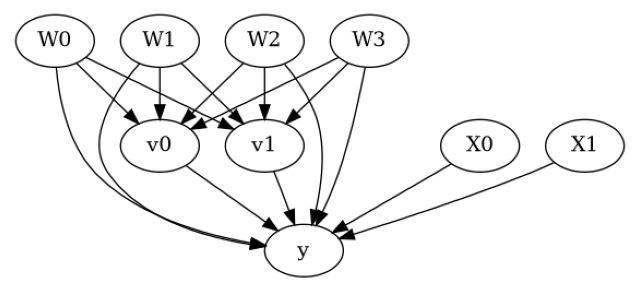

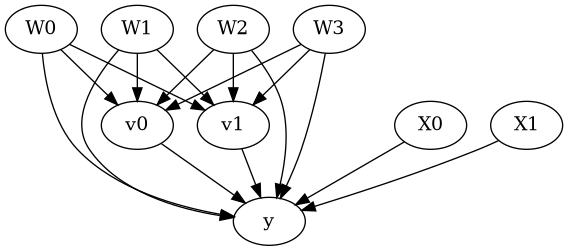

In [4]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [5]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
─────────(E[y|W0,W1,W2,W3])
d[v₀  v₁]                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W0,W1,W2,W3,U) = P(y|v0,v1,W0,W1,W2,W3)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## Linear model

Let us first see an example for a linear model. The control_value and treatment_value can be provided as a tuple/list when the treatment is multi-dimensional.

The interpretation is change in y when v0 and v1 are changed from (0,0) to (1,1).

In [6]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                        control_value=(0,0),
                                        treatment_value=(1,1),
                                        method_params={'need_conditional_estimates': False})
print(linear_estimate) 

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
─────────(E[y|W0,W1,W2,W3])
d[v₀  v₁]                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W0,W1,W2,W3,U) = P(y|v0,v1,W0,W1,W2,W3)

## Realized estimand
b: y~v0+v1+W0+W1+W2+W3+v0*X1+v0*X0+v1*X1+v1*X0
Target units: ate

## Estimate
Mean value: 30.129100626471924



You can estimate conditional effects, based on effect modifiers. 

In [7]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                        control_value=(0,0),
                                        treatment_value=(1,1))
print(linear_estimate) 

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
─────────(E[y|W0,W1,W2,W3])
d[v₀  v₁]                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W0,W1,W2,W3,U) = P(y|v0,v1,W0,W1,W2,W3)

## Realized estimand
b: y~v0+v1+W0+W1+W2+W3+v0*X1+v0*X0+v1*X1+v1*X0
Target units: 

## Estimate
Mean value: 30.129100626471924
### Conditional Estimates
__categorical__X1  __categorical__X0
(-3.928, -1.154]   (-3.791, -0.545]    -136.420274
                   (-0.545, 0.0306]     -72.063351
                   (0.0306, 0.55]       -34.184295
                   (0.55, 1.134]          9.164130
                   (1.134, 4.109]        73.826699
(-1.154, -0.589]   (-3.791, -0.545]     -95.548946
                   (-0.545, 0.0306]     -33.540204
                   (0.0306, 0.55]         6.000546
                   (0.55, 1.134]         45

## More methods

You can also use methods from EconML or CausalML libraries that support multiple treatments. You can look at examples from the conditional effect notebook: https://py-why.github.io/dowhy/example_notebooks/dowhy-conditional-treatment-effects.html

Propensity-based methods do not support multiple treatments currently. 
